In [1]:
#Prediction of Diabetes using Logistic Regression, GridSearchCV, SMOTE and Random Forest Classifier

In [2]:
# Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Reading data into a DataFrame from dataset stored on my Google Drive.

In [5]:
df = pd.read_csv('C:/logistic_regression_diabetes.csv')

In [6]:
df.shape

(768, 9)

In [7]:
# Contains 768 rows and 9 columns

In [8]:
# Viewing the head and tail of the df to get a basic idea of the dataset.

In [9]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# 2 Float and 7 int columns

sns.heatmap(df.corr())

In [13]:
# Checking for null values.

In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
# No null values

In [16]:
# Plotting histograms

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

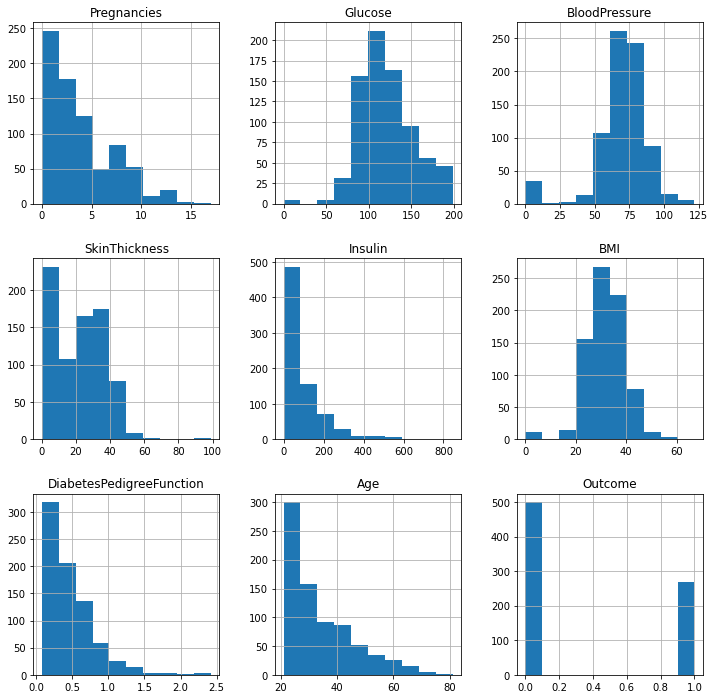

In [17]:
df.hist(figsize=(12,12))

In [18]:
# Importing library for data scaling.

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
# Scaling the numerical data.

In [22]:
diabetes_scaled=pd.DataFrame((scaler.fit_transform(df)),columns=df.columns)
diabetes_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [23]:
# Checking the Outcome column data

In [24]:
diabetes_scaled.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [25]:
diabetes_scaled.Outcome.value_counts()/len(diabetes_scaled)

0.0    0.651042
1.0    0.348958
Name: Outcome, dtype: float64

In [26]:
# The outcome column states that approximately 65% customers in this dataset do NOT have diabetes and 27% have diabetes.
# Hence, there is a class imbalance.

In [27]:
# First, let us get a baseline regression model.

In [28]:
# Splitting the DataFrame into dependent and independent variables.

In [29]:
y=diabetes_scaled.Outcome
x=diabetes_scaled.drop('Outcome',axis=1)

In [30]:
# Splitting the variables into train and test data.

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [32]:
# Importing libraries needed for logistic regression.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import metrics

In [34]:
# Fitting the train data on the logistic regression model.

In [35]:
reg=linear_model.LogisticRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_train)
print("accuracy: "+ str(reg.score(x_train,y_train)*100) + "%")

accuracy: 75.8957654723127%


In [36]:
# Confusion matrix.

In [37]:
cm = metrics.confusion_matrix(y_train, y_pred)
cm

array([[352,  41],
       [107, 114]], dtype=int64)

In [38]:
# Visualizing the confusion matrix.

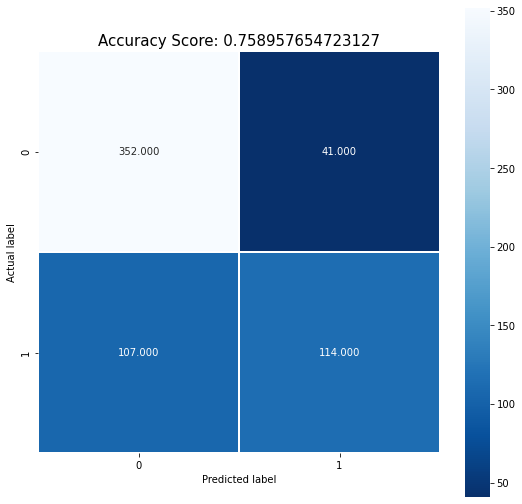

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg.score(x_train,y_train))
plt.title(all_sample_title, size = 15);

In [40]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))
print("F1 Score:",metrics.f1_score(y_train, y_pred,average="weighted"))

Accuracy: 0.758957654723127
Precision: 0.7354838709677419
Recall: 0.5158371040723982
F1 Score: 0.747138489680895


In [42]:
# Test Data

In [43]:
reg.fit(x_test,y_test)
y_pred_test=reg.predict(x_test)
print("accuracy: "+ str(reg.score(x_test,y_test)*100) + "%")

accuracy: 76.62337662337663%


In [44]:
cm_test = metrics.confusion_matrix(y_test, y_pred_test)
cm_test

array([[103,   4],
       [ 32,  15]], dtype=int64)

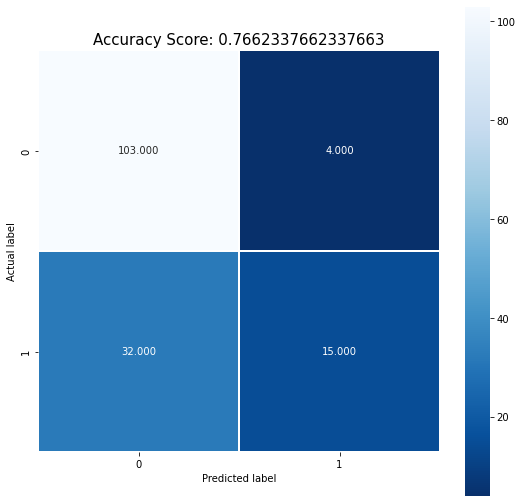

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg.score(x_test,y_test))
plt.title(all_sample_title, size = 15);

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 Score:",metrics.f1_score(y_test, y_pred_test,average="weighted"))

Accuracy: 0.7662337662337663
Precision: 0.7894736842105263
Recall: 0.3191489361702128
F1 Score: 0.7301706557904903


In [ ]:
# Accuracy of Logistic Regression is 76.6%. Recall is 32% and F1 score seems to be a healthy 73%.

# Since we are dealing with health data, we need to increase the Recall score as not to wrongly
# predict diseased patients as healthy.

In [47]:
# The coefficients of all features

In [48]:
reg.coef_[0]

array([ 1.84547866,  2.79403541,  0.04652535, -0.2081766 ,  0.50836725,
        1.04280624,  1.02717099,  0.55061365])

In [49]:
feature_imp = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': reg.coef_[0]})

In [50]:
feature_imp = feature_imp.sort_values(by='Importance',ascending=False)

In [51]:
# Plotting all the features in descending order of their importance.

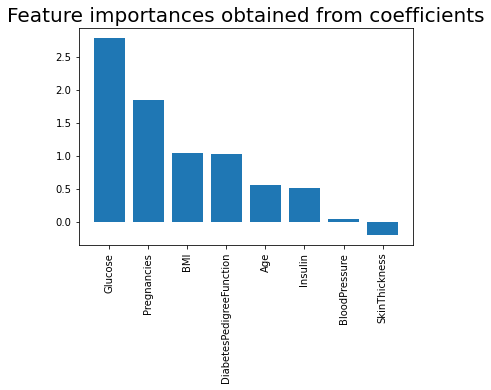

In [52]:
plt.bar(x=feature_imp['Attribute'], height=feature_imp['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
# Filtering the important columns to a new dataset.

In [54]:
diabetes_scaled_imp=diabetes_scaled.filter(['Glucose','BMI','Pregnancies','DiabetesPedigreeFunction','Age','BloodPressure','Outcome'])

In [55]:
y1=diabetes_scaled_imp.Outcome
x1=diabetes_scaled_imp.drop('Outcome',axis=1)

In [56]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,random_state=0,test_size=0.2)

In [57]:
reg1=linear_model.LogisticRegression()
reg1.fit(x_train1,y_train1)
y_pred1=reg1.predict(x_train1)
print("accuracy: "+ str(reg1.score(x_train1,y_train1)*100) + "%")

accuracy: 75.7328990228013%


In [58]:
cm1 = metrics.confusion_matrix(y_train1, y_pred1)
cm1

array([[351,  42],
       [107, 114]], dtype=int64)

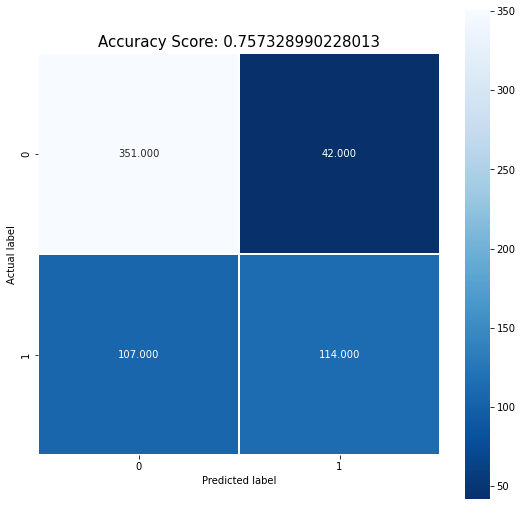

In [59]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg1.score(x_train1,y_train1))
plt.title(all_sample_title, size = 15);

In [60]:
print("Accuracy:",metrics.accuracy_score(y_train1, y_pred1))
print("Precision:",metrics.precision_score(y_train1, y_pred1))
print("Recall:",metrics.recall_score(y_train1, y_pred1))
print("F1 Score:",metrics.f1_score(y_train1, y_pred1,average="weighted"))

Accuracy: 0.757328990228013
Precision: 0.7307692307692307
Recall: 0.5158371040723982
F1 Score: 0.7456767698552343


In [62]:
# Test

In [63]:
y_pred1_test=reg1.predict(x_test1)
print("accuracy: "+ str(reg1.score(x_test1,y_test1)*100) + "%")

accuracy: 83.76623376623377%


In [64]:
cm1_test = metrics.confusion_matrix(y_test1, y_pred1_test)
cm1_test

array([[101,   6],
       [ 19,  28]], dtype=int64)

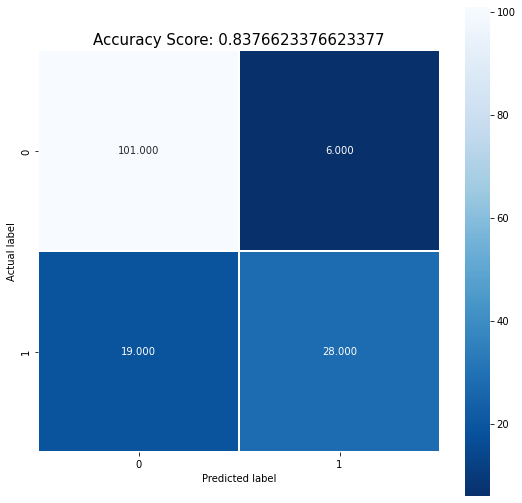

In [65]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg1.score(x_test1,y_test1))
plt.title(all_sample_title, size = 15);

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1_test))
print("Precision:",metrics.precision_score(y_test1, y_pred1_test))
print("Recall:",metrics.recall_score(y_test1, y_pred1_test))
print("F1 Score:",metrics.f1_score(y_test1, y_pred1_test,average="weighted"))

Accuracy: 0.8376623376623377
Precision: 0.8235294117647058
Recall: 0.5957446808510638
F1 Score: 0.8292836765670833


In [ ]:
# All metrics have increased after selecting features based on coefficients that we received from Logistic Regression.

# Accuracy is now 83.8%, while recall is 59.5%, F1 score being 83%.

In [67]:
# Next, hyperparameter tuning using GridSearchCV.

In [68]:
# Disabling warnings as Gridsearch for logistic regression tends to generate a lot of warnings.

In [69]:
import warnings
warnings.filterwarnings('ignore')

# Hyperparameter tuning using Grid Search CV

In [70]:
reg2=linear_model.LogisticRegression()

In [71]:
# Importing library for GridSearchCV.

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
# Defining parameters.

In [74]:
params= {'C': (np.logspace(-3,3,7)), 'penalty': ['l1','l2'],
                  'class_weight': ['None','balanced'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [75]:
# Defining GridSearchCV to find out combinations for best recall score.

In [76]:
gscv = GridSearchCV(estimator=reg2, 
                    param_grid=params,
                    scoring= ['accuracy','f1','precision','recall'],
                     refit='recall', cv=10)

In [77]:
# Fitting train data on defined GridSearch model.

In [78]:
gscv.fit(x_train1,y_train1)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': ['None', 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             refit='recall', scoring=['accuracy', 'f1', 'precision', 'recall'])

In [79]:
print("Best parameters:", gscv.best_params_)

Best parameters: {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [80]:
# Above are the best parameters as per GridSearchCV.

In [81]:
print("Accuracy :",gscv.best_score_)

Accuracy : 1.0


In [82]:
print("Accuracy :",gscv.best_estimator_)

Accuracy : LogisticRegression(C=0.001, class_weight='balanced', solver='liblinear')


In [83]:
# Using the above parameter results for logistic regression, with a few changes

In [84]:
reg3=linear_model.LogisticRegression(C=0.1,class_weight='balanced',solver='liblinear',penalty='l2')
reg3.fit(x_train1,y_train1)
y_pred3=reg3.predict(x_train1)
print("accuracy: "+ str(reg3.score(x_train1,y_train1)*100) + "%")

accuracy: 72.80130293159608%


In [85]:
cm3 = metrics.confusion_matrix(y_train1, y_pred3)
cm3

array([[274, 119],
       [ 48, 173]], dtype=int64)

In [86]:
print("Accuracy:",metrics.accuracy_score(y_train1, y_pred3))
print("Precision:",metrics.precision_score(y_train1, y_pred3))
print("Recall:",metrics.recall_score(y_train1, y_pred3))
print("F1 Score:",metrics.f1_score(y_train1, y_pred3,average="weighted"))

Accuracy: 0.7280130293159609
Precision: 0.5924657534246576
Recall: 0.7828054298642534
F1 Score: 0.7333304915681051


In [87]:
# Test Data

In [88]:
y_pred3_test=reg3.predict(x_test1)
print("accuracy: "+ str(reg3.score(x_test1,y_test1)*100) + "%")

accuracy: 76.62337662337663%


In [89]:
cm3_test = metrics.confusion_matrix(y_test1, y_pred3_test)
cm3_test

array([[79, 28],
       [ 8, 39]], dtype=int64)

In [90]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred3_test))
print("Precision:",metrics.precision_score(y_test1, y_pred3_test))
print("Recall:",metrics.recall_score(y_test1, y_pred3_test))
print("F1 Score:",metrics.f1_score(y_test1, y_pred3_test,average="weighted"))

Accuracy: 0.7662337662337663
Precision: 0.582089552238806
Recall: 0.8297872340425532
F1 Score: 0.7746897703490215


In [ ]:
# Accuracy and F1 Score have slightly fallen. Precision has taken a dip of 24%.
# But the Recall has increased to 83%, which was the target.

# Oversampling using SMOTE

In [91]:
# Additional trial to further observe the changes in metrics. 
# Since the data is imbalanced, using oversampling technique to balance the data.

In [92]:
# Importing library for SMOTE.

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
smote=SMOTE()

In [95]:
x1_resample, y1_resample = smote.fit_resample(x1, y1)

In [96]:
# Above is the resampled data.

In [97]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x1_resample,y1_resample,random_state=0,test_size=0.2)

In [98]:
# Fitting the resampled data on the model hyperparameters received from GridSearchCV.
# Dropped the class_weight parameter, as we have resampled the data.

In [99]:
reg4=linear_model.LogisticRegression(C=100,solver='liblinear',penalty='l1')
reg4.fit(x_train2,y_train2)
y_pred4=reg4.predict(x_train2)
print("accuracy: "+ str(reg4.score(x_train2,y_train2)*100) + "%")

accuracy: 75.25%


In [100]:
cm4 = metrics.confusion_matrix(y_train2, y_pred4)
cm4

array([[305,  90],
       [108, 297]], dtype=int64)

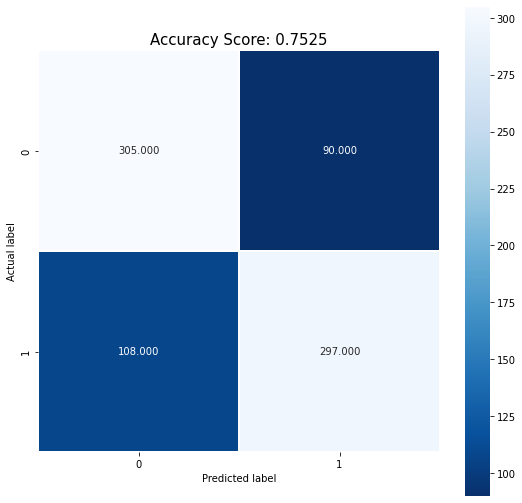

In [101]:
plt.figure(figsize=(9,9))
sns.heatmap(cm4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg4.score(x_train2,y_train2))
plt.title(all_sample_title, size = 15);

In [102]:
print("Accuracy:",metrics.accuracy_score(y_train2, y_pred4))
print("Precision:",metrics.precision_score(y_train2, y_pred4))
print("Recall:",metrics.recall_score(y_train2, y_pred4))
print("F1 Score:",metrics.f1_score(y_train2, y_pred4,average="weighted"))

Accuracy: 0.7525
Precision: 0.7674418604651163
Recall: 0.7333333333333333
F1 Score: 0.7524443069306929


In [140]:
# Test Data

In [104]:
y_pred4_test=reg4.predict(x_test2)
print("accuracy: "+ str(reg4.score(x_test2,y_test2)*100) + "%")

accuracy: 81.0%


In [105]:
cm4_test = metrics.confusion_matrix(y_test2, y_pred4_test)
cm4_test

array([[85, 20],
       [18, 77]], dtype=int64)

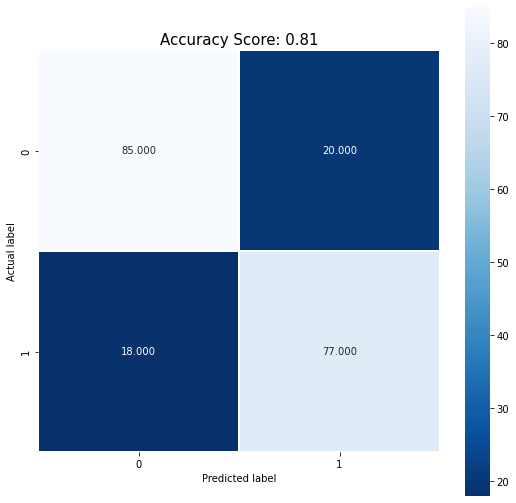

In [106]:
plt.figure(figsize=(9,9))
sns.heatmap(cm4_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg4.score(x_test2,y_test2))
plt.title(all_sample_title, size = 15);

In [107]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred4_test))
print("Precision:",metrics.precision_score(y_test2, y_pred4_test))
print("Recall:",metrics.recall_score(y_test2, y_pred4_test))
print("F1 Score:",metrics.f1_score(y_test2, y_pred4_test,average="weighted"))

Accuracy: 0.81
Precision: 0.7938144329896907
Recall: 0.8105263157894737
F1 Score: 0.8100761217948719


In [ ]:
# Accuracy, Precision and F1 score have increased, while Recall score has decreased from 83% to 81%

# Now, trials using Random Forest Classifier

In [108]:
# Importing libraries necessary for Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [110]:
# Fitting the model with data before SMOTE oversampling and scaling.

In [111]:
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred5 = model.predict(x_train)

print("Accuracy Score:",accuracy_score(y_train,y_pred5))

Accuracy Score: 1.0


In [112]:
cm5 = metrics.confusion_matrix(y_train, y_pred5)
cm5

array([[393,   0],
       [  0, 221]], dtype=int64)

In [113]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred5))
print("Precision:",metrics.precision_score(y_train, y_pred5))
print("Recall:",metrics.recall_score(y_train, y_pred5))
print("F1 Score:",metrics.f1_score(y_train, y_pred5,average="weighted"))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [115]:
# Test Data

In [116]:
y_pred5_test = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred5_test))

Accuracy Score: 0.7987012987012987


In [117]:
cm5_test = metrics.confusion_matrix(y_test, y_pred5_test)
cm5_test

array([[94, 13],
       [18, 29]], dtype=int64)

In [118]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5_test))
print("Precision:",metrics.precision_score(y_test, y_pred5_test))
print("Recall:",metrics.recall_score(y_test, y_pred5_test))
print("F1 Score:",metrics.f1_score(y_test, y_pred5_test,average="weighted"))

Accuracy: 0.7987012987012987
Precision: 0.6904761904761905
Recall: 0.6170212765957447
F1 Score: 0.795344771179772


In [ ]:
# Accuracy is a decent 79.9%, but Precision and Recall are 69% and 61.7% respectively.

In [119]:
model1 = RandomForestClassifier(random_state=1)
model1.fit(x_train1, y_train1)
y_pred6 = model1.predict(x_train1)

print("Accuracy Score:",accuracy_score(y_train1,y_pred6))

Accuracy Score: 1.0


In [120]:
cm6 = metrics.confusion_matrix(y_train1, y_pred6)
cm6

array([[393,   0],
       [  0, 221]], dtype=int64)

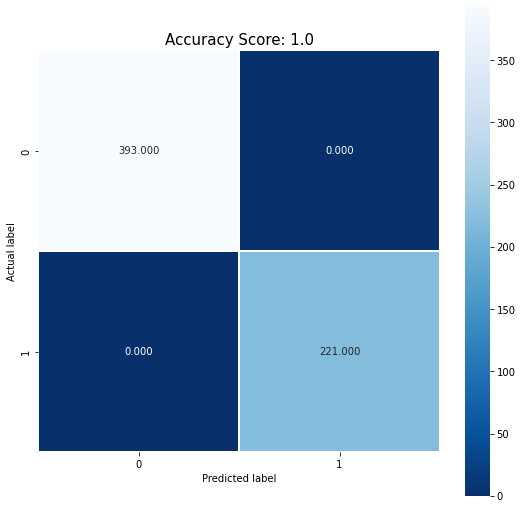

In [121]:
plt.figure(figsize=(9,9))
sns.heatmap(cm6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model1.score(x_train1,y_train1))
plt.title(all_sample_title, size = 15);

In [122]:
print("Accuracy:",metrics.accuracy_score(y_train1, y_pred6))
print("Precision:",metrics.precision_score(y_train1, y_pred6))
print("Recall:",metrics.recall_score(y_train1, y_pred6))
print("F1 Score:",metrics.f1_score(y_train1, y_pred6,average="weighted"))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [123]:
# Test Data

In [124]:
y_pred6_test = model1.predict(x_test1)

print("Accuracy Score:",accuracy_score(y_test1,y_pred6_test))

Accuracy Score: 0.7987012987012987


In [125]:
cm6_test = metrics.confusion_matrix(y_test1, y_pred6_test)
cm6_test

array([[95, 12],
       [19, 28]], dtype=int64)

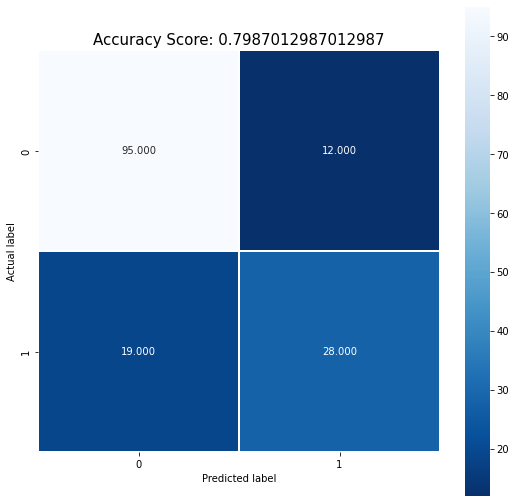

In [126]:
plt.figure(figsize=(9,9))
sns.heatmap(cm6_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model1.score(x_test1,y_test1))
plt.title(all_sample_title, size = 15);

In [127]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred6_test))
print("Precision:",metrics.precision_score(y_test1, y_pred6_test))
print("Recall:",metrics.recall_score(y_test1, y_pred6_test))
print("F1 Score:",metrics.f1_score(y_test1, y_pred6_test,average="weighted"))

Accuracy: 0.7987012987012987
Precision: 0.7
Recall: 0.5957446808510638
F1 Score: 0.7937910635679397


In [ ]:
# Accuracy remained the same, Precision has slightly increased and Recall has slightly decreased.

In [128]:
# Let us see if the scores improve on data that was oversampled using SMOTE.

In [129]:
# Fitting the model with data after SMOTE oversampling.

In [130]:
model2 = RandomForestClassifier(random_state=1)
model2.fit(x_train2, y_train2)
y_pred7 = model2.predict(x_train2)

print("Accuracy Score:",accuracy_score(y_train2,y_pred7))

Accuracy Score: 1.0


In [132]:
cm7 = metrics.confusion_matrix(y_train2, y_pred7)
cm7

array([[395,   0],
       [  0, 405]], dtype=int64)

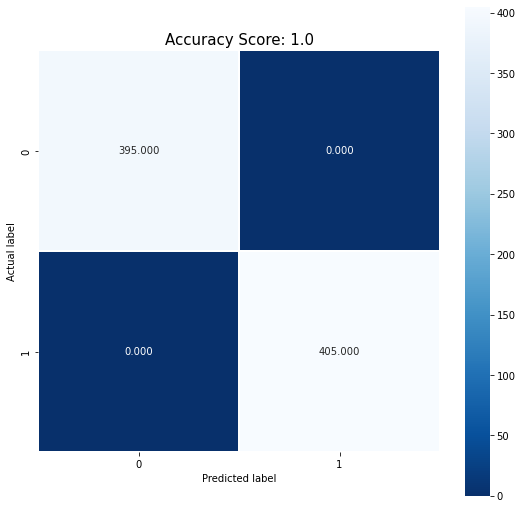

In [133]:
plt.figure(figsize=(9,9))
sns.heatmap(cm7, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model2.score(x_train2,y_train2))
plt.title(all_sample_title, size = 15);

In [134]:
print("Accuracy:",metrics.accuracy_score(y_train2, y_pred7))
print("Precision:",metrics.precision_score(y_train2, y_pred7))
print("Recall:",metrics.recall_score(y_train2, y_pred7))
print("F1 Score:",metrics.f1_score(y_train2, y_pred7,average="weighted"))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [135]:
# Test Data

In [136]:
y_pred7_test = model2.predict(x_test2)

print("Accuracy Score:",accuracy_score(y_test2,y_pred7_test))

Accuracy Score: 0.895


In [137]:
cm7_test = metrics.confusion_matrix(y_test2, y_pred7_test)
cm7_test

array([[89, 16],
       [ 5, 90]], dtype=int64)

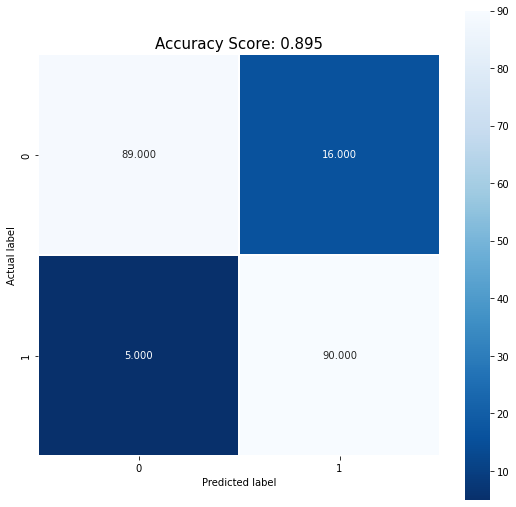

In [138]:
plt.figure(figsize=(9,9))
sns.heatmap(cm7_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model2.score(x_test2,y_test2))
plt.title(all_sample_title, size = 15);

In [139]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred7_test))
print("Precision:",metrics.precision_score(y_test2, y_pred7_test))
print("Recall:",metrics.recall_score(y_test2, y_pred7_test))
print("F1 Score:",metrics.f1_score(y_test2, y_pred7_test,average="weighted"))

Accuracy: 0.895
Precision: 0.8490566037735849
Recall: 0.9473684210526315
F1 Score: 0.8949711242781069


In [ ]:
# The accuracy and F1 score have increased and are better than any other models. Accuracy and F1 Score are both 84.5%.
# Recall is 94.7%, precision has significantly increased to 85%.

# Hence, this seems to be the best model of all, as it will capture 94.7% cases of diabetes correctly.
